# Wavelength Loss dependence using BraggExact

Here for the N1 configuration from Bird.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from fiberamp.fiber.microstruct.bragg import BraggExact
from step_exact import plotlogf
from ngsolve.webgui import Draw
from scipy.optimize import newton

importing NGSolve-6.2.2203-56-g47f483033


# Initialize

In [2]:
n = 300
wls = np.linspace(1.4e-6, 2e-6, n+1)
betas1 = np.zeros_like(wls, dtype=complex)
outer = 'h2'
nu = 1

In [31]:
n_air = 1.00027717
n_glass = 1.4388164768221814

ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_air]

ts = [4.0775e-05, 1e-5, 4.0775e-05]

mats = ['air', 'glass', 'air']

maxhs = [1, 1, 1]

# Four Layer Study: Glass outside Air (Outside Cladding)

In [5]:
betas1 = np.zeros_like(wls, dtype=complex)

for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
          
    A = BraggExact(ts=ts, maxhs=maxhs, wl=wl, mats=mats, ns=ns, no_mesh=True)

    k_low = A.ks[0] * A.scale
    guess = np.array(.9999 * k_low)
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess-1e-5j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess *= 1/.9999999
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .9999999
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas1[i] = beta
    

     --------------------  1/301: wavelength: 1.4e-06  --------------------     

Scaled beta:  (67.33279925360031-4.654441237191158e-06j) . Residual of determinant:  6.938137608365507e-10 


     --------------------  2/301: wavelength: 1.4019999999999999e-06  --------------------     

Scaled beta:  (67.23671719706587-4.062535725861575e-06j) . Residual of determinant:  2.7884167851884345e-10 


     --------------------  3/301: wavelength: 1.404e-06  --------------------     

Scaled beta:  (67.14091044873568-3.6092727708168477e-06j) . Residual of determinant:  3.6203347369045016e-10 


     --------------------  4/301: wavelength: 1.406e-06  --------------------     

Scaled beta:  (67.04537746382401-3.2569229221717834e-06j) . Residual of determinant:  4.1269785848639224e-11 


     --------------------  5/301: wavelength: 1.408e-06  --------------------     

Scaled beta:  (66.95011680429063-2.9801357826611957e-06j) . Residual of determinant:  9.02382484062948e-10 


     ---------

scaling guess: 1
scaling guess: 2
Scaled beta:  (63.768082255840945-0.007985414829859573j) . Residual of determinant:  7.750039033575005e-15 


     --------------------  41/301: wavelength: 1.48e-06  --------------------     

Scaled beta:  (63.693586296955786-0.00025640060507131754j) . Residual of determinant:  2.911673141675625e-12 


     --------------------  42/301: wavelength: 1.482e-06  --------------------     

Scaled beta:  (63.60717264743896-0.00010231557010980043j) . Residual of determinant:  2.6082067638545314e-11 


     --------------------  43/301: wavelength: 1.484e-06  --------------------     

Scaled beta:  (63.52123372130535-5.463632390430679e-05j) . Residual of determinant:  2.6926263200069343e-11 


     --------------------  44/301: wavelength: 1.4859999999999998e-06  --------------------     

Scaled beta:  (63.43561153808871-3.409205282440902e-05j) . Residual of determinant:  2.6933910629690525e-12 


     --------------------  45/301: wavelength: 1.488e-06  

Scaled beta:  (60.58079329075076-4.520033419399476e-06j) . Residual of determinant:  3.6638198975522366e-10 


     --------------------  80/301: wavelength: 1.558e-06  --------------------     

Scaled beta:  (60.50299853393623-4.958539620186611e-06j) . Residual of determinant:  2.559254273237645e-10 


     --------------------  81/301: wavelength: 1.5599999999999999e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
scaling guess: 7
scaling guess: 8
Scaled beta:  (60.42540216515157-5.493433524799169e-06j) . Residual of determinant:  1.3342716793479704e-10 


     --------------------  82/301: wavelength: 1.5619999999999998e-06  --------------------     

Scaled beta:  (60.34800318961266-6.152167036076298e-06j) . Residual of determinant:  1.017513075534538e-11 


     --------------------  83/301: wavelength: 1.564e-06  --------------------     

Scaled beta:  (60.2708005501568-6.9730086278276605e-06j)

scaling guess: 1
scaling guess: 2
Scaled beta:  (57.759174948403874-4.3382493310910185e-06j) . Residual of determinant:  3.632024248762085e-11 


     --------------------  118/301: wavelength: 1.634e-06  --------------------     

Scaled beta:  (57.6884537536051-4.125587375910371e-06j) . Residual of determinant:  1.9105079897028654e-10 


     --------------------  119/301: wavelength: 1.6359999999999999e-06  --------------------     

scaling guess: 1
Scaled beta:  (57.61790582471974-3.9475348588160814e-06j) . Residual of determinant:  4.5069292439497143e-10 


     --------------------  120/301: wavelength: 1.6379999999999998e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (57.547530464006584-3.7992216032305993e-06j) . Residual of determinant:  3.178206960784585e-10 


     --------------------  121/301: wavelength: 1.64e-06  --------------------     

Scaled beta:  (57.47732698585041-3.6768189339116023e-06j) . Residual of determinant:  2.267843536308

scaling guess: 2
scaling guess: 3
Scaled beta:  (55.12337720163439-4.618992243158856e-05j) . Residual of determinant:  2.547295746410664e-12 


     --------------------  157/301: wavelength: 1.7119999999999999e-06  --------------------     

scaling guess: 1
Scaled beta:  (55.05887715073226-6.396683766911214e-05j) . Residual of determinant:  1.6926848421093215e-11 


     --------------------  158/301: wavelength: 1.714e-06  --------------------     

scaling guess: 1
Scaled beta:  (54.99449333366878-9.431393528126554e-05j) . Residual of determinant:  4.293035749696468e-12 


     --------------------  159/301: wavelength: 1.716e-06  --------------------     

Scaled beta:  (54.93020088758346-0.00015195382581717202j) . Residual of determinant:  4.9905723686981556e-12 


     --------------------  160/301: wavelength: 1.718e-06  --------------------     

Scaled beta:  (54.865948336585625-0.0002794168988396011j) . Residual of determinant:  1.4793296496196402e-12 


     ---------------

scaling guess: 1
Scaled beta:  (52.89608110270625-4.660992614900184e-06j) . Residual of determinant:  2.0704410347751153e-10 


     --------------------  193/301: wavelength: 1.7839999999999998e-06  --------------------     

Scaled beta:  (52.836757282972776-4.560776906836735e-06j) . Residual of determinant:  6.918333745750668e-10 


     --------------------  194/301: wavelength: 1.786e-06  --------------------     

Scaled beta:  (52.777566440176756-4.479038369448501e-06j) . Residual of determinant:  9.026054884869977e-11 


     --------------------  195/301: wavelength: 1.7879999999999999e-06  --------------------     

scaling guess: 1
Scaled beta:  (52.71850810143124-4.414411273894012e-06j) . Residual of determinant:  8.624399601872154e-11 


     --------------------  196/301: wavelength: 1.7899999999999998e-06  --------------------     

scaling guess: 1
Scaled beta:  (52.659581797905005-4.365819439671875e-06j) . Residual of determinant:  6.611691465513159e-10 


     -------

scaling guess: 1
Scaled beta:  (50.622243732469535-4.690928678032057e-05j) . Residual of determinant:  3.256859309649744e-11 


     --------------------  233/301: wavelength: 1.8639999999999999e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
scaling guess: 7
Scaled beta:  (50.567845269966256-5.9431425210821754e-05j) . Residual of determinant:  7.43075831778781e-12 


     --------------------  234/301: wavelength: 1.8659999999999998e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (50.513545800366025-7.775947897992874e-05j) . Residual of determinant:  9.321118589807254e-12 


     --------------------  235/301: wavelength: 1.868e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
Scaled beta:  (50.45933691959603-0.00010600475973744816j) . Residual of determinant:  1.1769772680066705e-11 


     -----------

Scaled beta:  (48.687278157350946-7.4827667078015416e-06j) . Residual of determinant:  1.6346724003376118e-11 


     --------------------  270/301: wavelength: 1.938e-06  --------------------     

scaling guess: 1
Scaled beta:  (48.63700849210639-7.2009727888400866e-06j) . Residual of determinant:  3.394077771686439e-10 


     --------------------  271/301: wavelength: 1.94e-06  --------------------     

Scaled beta:  (48.58684276352698-6.952429377354979e-06j) . Residual of determinant:  1.2623984428298633e-10 


     --------------------  272/301: wavelength: 1.9419999999999998e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (48.53678061330021-6.733463274108643e-06j) . Residual of determinant:  1.0565999361912105e-10 


     --------------------  273/301: wavelength: 1.944e-06  --------------------     

Scaled beta:  (48.486821688688416-6.540988355355368e-06j) . Residual of determinant:  4.002182655583033e-11 


     --------------------  274/301: 

In [32]:
# Formula for loss spikes from article

ms = np.arange(11,15,1)

n1 = A.ns[0]  # Inner (core) index
n2 = A.ns[1]  # Cladding index

d = 15*2/3*1e-6

ls = (2 * n1 * d / ms * ((n2/n1)**2 - 1)**.5)  # when n2 depends on ls, need solver
ls

array([1.88042411e-06, 1.72372210e-06, 1.59112809e-06, 1.47747609e-06])

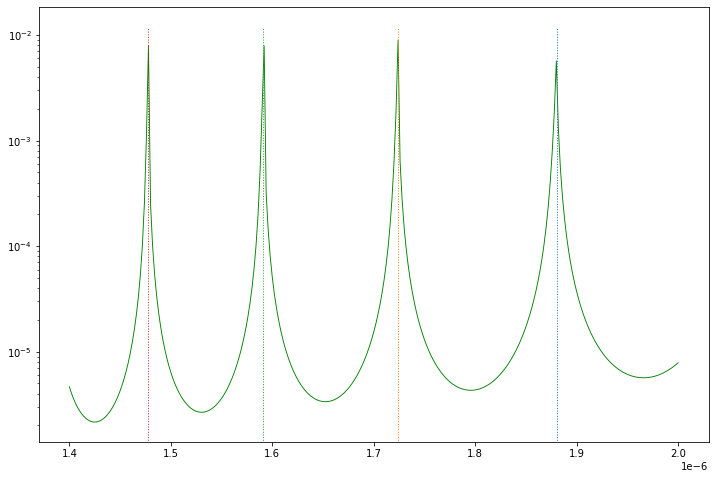

In [33]:
%matplotlib inline
plt.figure(figsize=(12,8))
plt.plot(wls, -betas1.imag, color='green', linewidth=.9)
plt.yscale('log')
for l in ls:
    plt.plot([l,l], [0, .012],  linewidth=1, linestyle=':')

In [36]:
ls[2], betas1[np.where(np.abs(wls-ls[2])<1e-9)]

(1.5911280930972464e-06, array([59.19724018-0.0079122j]))

In [38]:
print(wls[np.where(np.abs(wls-ls[2])<1e-9)][0])

1.592e-06


In [ ]:
np.save('../../Air_Buffer_Thickness_Studies/N2_studies/data/N1_wls.npy', betas1)

# This is/(was) wrong, it's finding a HOM

Caught this when trying to see if N2 -> N1 when increasing buffer air thickness

## Bad wavelengths

In [ ]:
ls
np.where(abs(wls-1.88e-6)<(wls[1]-wls[0]))

In [ ]:
wls[240]

In [ ]:
A = BraggExact(ts=ts, ns=ns, maxhs=[.1 ,.02, .04, .02], wl=wls[240])


In [ ]:
k_low = A.ks[0] * A.scale


In [ ]:
plotlogf(A.determinant, .9998*k_low, k_low, -.0015,.0015, nu, outer,
         iref=100, rref=100, levels=100, figsize=(8,6))

In [ ]:
guess = np.array(50.1448)
imag = 0
x0 = np.array(guess + imag*1j)

beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
beta

In [ ]:
betas1[240] = beta

In [ ]:
%matplotlib notebook
plt.figure(figsize=(8,5))
plt.plot(wls, -betas1.imag, color='green', linewidth=.9)
plt.yscale('log')
for l in ls:
    plt.plot([l,l], [0, .0001],  linewidth=1, linestyle=':')

# Using Sellmeier

In [ ]:
betas2=np.zeros_like(betas1)
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
          
    A = BraggExact(ts=ts, maxhs=[1 ,1, 1, 1], wl=wl)

    k_low = A.ks[0] * A.scale
    guess = np.array(.99995 * k_low)
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess *= 1/.999999
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .999999
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas2[i] = beta
    

In [ ]:
ls_sell=np.load('ls_sell.npy')

In [ ]:
%matplotlib notebook
plt.figure(figsize=(8,5))
plt.plot(wls, -betas1.imag, color='green', linewidth=.9, label='no sellmeier')
plt.plot(wls, -betas2.imag, color='red', linewidth=.9, label='sellmeier')
plt.yscale('log')
plt.legend()
for l in ls_sell:
    plt.plot([l,l], [0, .0001],  linewidth=1, color='r',linestyle=':')
for l in ls:
    plt.plot([l,l], [0, .0001],  linewidth=1, color='g',linestyle=':')
